In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Implementing Polynomial Regression Model

In [2]:
class PolynomialRegression():
    def __init__(self, lr = 0.001, epochs = 1000, degree = 2):
        self.lr = lr
        self.epochs = epochs
        self.degree = degree
        self.weights = None
        self.bias = None
        
    def _generate_polynomial_features(self,X):
        X = X.reshape(X.shape[0],1)
        X_poly = X.reshape(X.shape[0],1)
        for deg in range(2, self.degree+1):
            X_poly = np.concatenate((X_poly, X**deg), axis = 1)
        return X_poly
    
    def fit(self, X, y):
        X_poly = self._generate_polynomial_features(X)
        n_samples, n_features = X_poly.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        cost = []
        it = []
        
        for i in range(self.epochs):
            y_pred = np.dot(X_poly,self.weights) + self.bias
            cost.append(np.sum((y_pred - y)**2)/n_samples)
            it.append(i+1)
            dw = (1 / n_samples) * np.dot(X_poly.T, (y_pred.T - y))
            db = np.sum(y_pred.T - y) / n_samples
            
            self.weights = self.weights - (self.lr * dw)
            self.bias = self.bias - (self.lr * db)
            
            plt.plot(it,cost,color = 'r')
    def predict(self,X):
        X_poly = self._generate_polynomial_features(X)
        
        y_pred = np.dot(X_poly, self.weights) + self.bias
        return y_pred

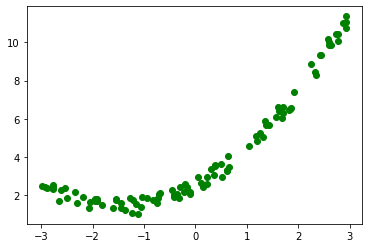

In [3]:
# dataset = pd.read_csv('Position_Salaries.csv')
# X = dataset.iloc[:, 1:2].values
# y = dataset.iloc[:, -1].values
X = 6 * np.random.rand(100,1) - 3
y = (0.5 * X**2 + 1.5*X + 2 + np.random.rand(100,1))
y = y[:,0]
plt.scatter(X,y,color = 'g')

# Fitting Polynomial Regression model to the dataset

Y pred
 [ 1.74357852  1.49119909  3.03855407  9.76352778  1.608516    1.5076574
  1.84983592  1.48782775  5.45027584 11.11295904  3.14440239  8.73745204
  5.17772062  9.68708142  1.49742792  2.24920877  2.29249136  3.74519593
  2.02086239  8.67813541  1.62304212  2.91953731  1.53332636  4.61422355
  2.89738761  2.34466174  1.68822145 11.1759009   5.04964899  2.34099754
  2.41000434  1.57559507  2.09251315  1.99942121  1.78346256 10.91790202
  1.87043903  1.56550336  2.3661912   1.49150263  1.55005597  9.74015929
  2.19586845  3.42631054  3.6317084   2.04344086  1.51594198  2.6466011
  2.42155939  1.75222602  2.05770256  4.96148917  6.90318636  3.19683253
  2.63626881  3.63175103  1.77610512 10.30419158  2.34312097  2.79297615
  2.1495301   1.67412011  1.49300447  1.48793362  2.15290575  3.69011073
  2.0425571   3.19306297  5.32149978  1.52030611  5.50761354  3.43869962
  6.48492223 11.10567079  6.08508319  9.90223365  6.44057837  9.15131212
  5.65765638  1.54733225 10.43386871  1.66168

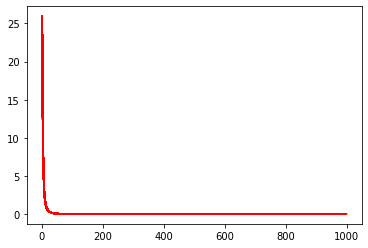

In [4]:
poly_regressor = PolynomialRegression(lr = 0.1,epochs = 1000,degree = 2)
poly_regressor.fit(X,y)
y_pred = poly_regressor.predict(X)
cost = 1/ X.shape[0] * (np.sum(np.power((y_pred-y),2)))
print('Y pred\n',y_pred,'\n Y \n',y)


# Visualizing the Training Result

In [ ]:
# Sort the data for proper plotting
sorted_indices = np.argsort(X.flatten())
X_sorted = X.flatten()[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

plt.scatter(X, y, color = 'red')
plt.plot(X_sorted,y_pred_sorted, color = 'b')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position Lavel')
plt.ylabel('Salary')
plt.show()
